In [25]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import re,nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, auc

In [2]:
# Loading datasets for training, testing, and validation
train_df = pd.read_csv(r"C:\Users\aisho\OneDrive\Desktop\imdb (1)\Train.csv")
test_df = pd.read_csv(r"C:\Users\aisho\OneDrive\Desktop\imdb (1)\Test.csv")
valid_df = pd.read_csv(r"C:\Users\aisho\OneDrive\Desktop\imdb (1)\Valid.csv")

In [3]:
# Displaying the first few rows of each dataset (train, test, and validation)
print(train_df.head())
print(test_df.head())
print(valid_df.head())

                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1
                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0
                                                text  label
0  It's been about 14 years since Sharon Stone aw...      0
1  someone needed to make a car payment... this i...      0
2  The Guidelines state that a comment must conta...      0
3  This movie is a muddled mish-mash of 

In [4]:
train_df[:5]

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
train_df['label'].value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

C:\Users\aisho\AppData\Local\Temp\ipykernel_19904\883694915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='viridis')


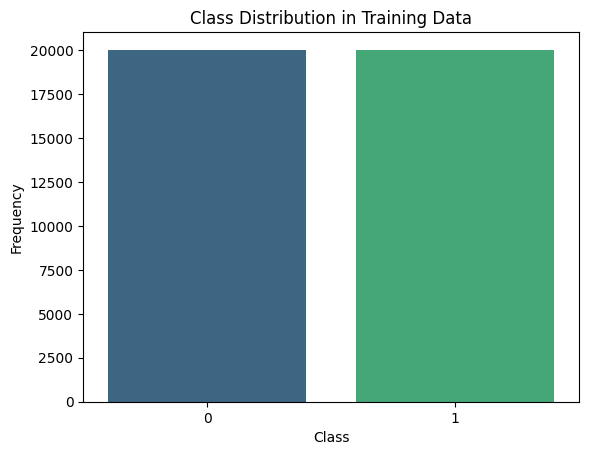

In [6]:
# Visualizing the class distribution in the training dataset using a countplot
sns.countplot(x='label', data=train_df, palette='viridis')
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Initializing objects for text preprocessing tasks:lemmatization, and stopword removal

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

In [16]:
# Function for cleaning text: removes HTML tags, stopwords, and applies lemmatization
def clean_text(text):
  
    text = re.sub(r'<br>', '', text)
   
    text = re.sub(r'<.*?>', '', text)
    
    words = word_tokenize(text)
    
    words = [word for word in words if word.lower() not in stop_words]
    
    words = [lemmatizer.lemmatize(word) for word in words]
    
    cleaned_text = ' '.join(words)
    return cleaned_text


In [10]:
# Applying the clean_text function to each dataset (train, test, and validation) to create a 'cleaned_text' column
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)
valid_df['cleaned_text'] = valid_df['text'].apply(clean_text)

In [11]:
train_df['cleaned_text'][:5]

0    grew ( b . 1965 ) watching loving Thunderbirds...
1    put movie DVD player , sat coke chip , expecta...
2    people know particular time past like feel nee...
3    Even though great interest Biblical movie , bo...
4    Im die hard Dads Army fan nothing ever change ...
Name: cleaned_text, dtype: object

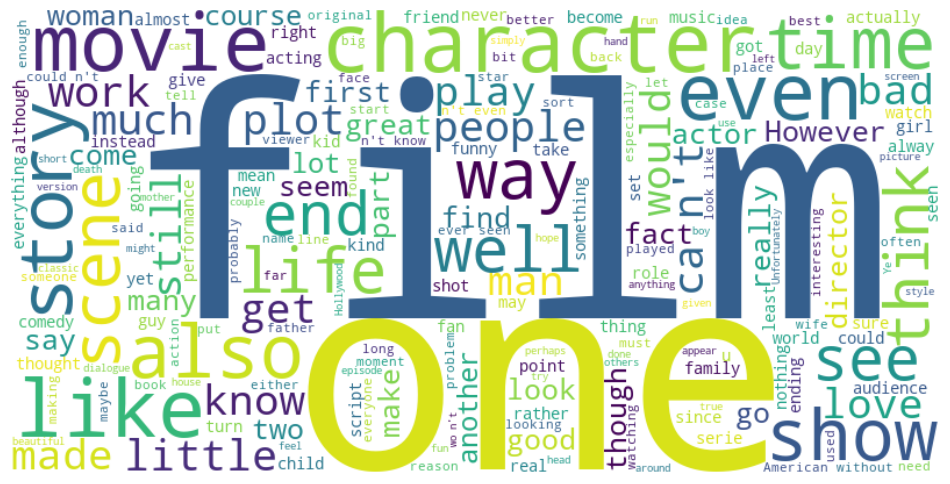

In [12]:
# Generating a word cloud from the cleaned text in the training dataset
from wordcloud import WordCloud

all_text = ' '.join(train_df['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=stop_words).generate(all_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
# Splitting the cleaned text and labels for training, testing, and validation datasets
X_train = train_df['cleaned_text']
y_train = train_df['label'] 
X_test = test_df['cleaned_text']
y_test = test_df['label']
X_valid = valid_df['cleaned_text']
y_valid = valid_df['label']


In [18]:
# Transforming the cleaned text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
X_valid_tfidf = tfidf.transform(X_valid)


In [19]:
#Build our model
model = LogisticRegression(max_iter=1000)  
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# Making predictions on the test and validation datasets
y_pred_test = model.predict(X_test_tfidf)
y_pred_valid = model.predict(X_valid_tfidf)

In [21]:
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy:  0.8908
Test Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      2495
           1       0.88      0.90      0.89      2505

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



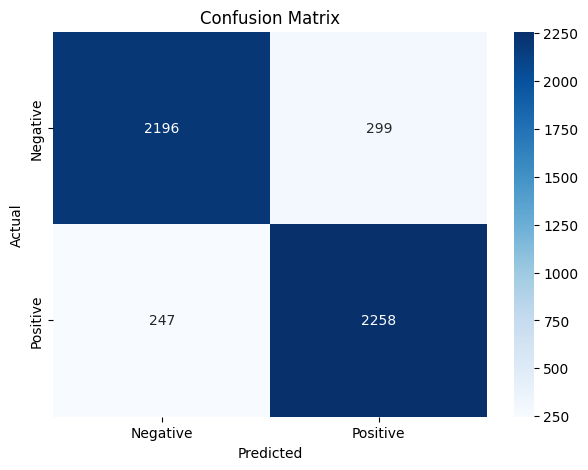

In [22]:
# Generating and displaying the confusion matrix for the test dataset predictions
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
print("Validation Accuracy: ", accuracy_score(y_valid, y_pred_valid))
print("Validation Classification Report:\n", classification_report(y_valid, y_pred_valid))

Validation Accuracy:  0.8818
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      2486
           1       0.87      0.90      0.88      2514

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



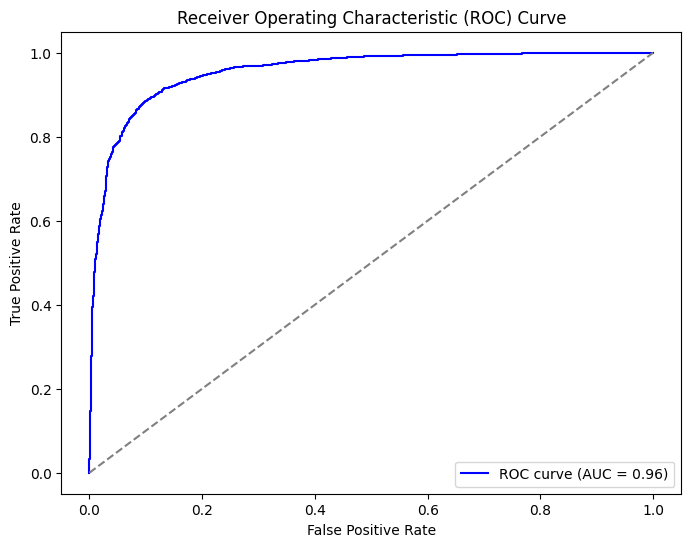

In [26]:
# Plotting the ROC curve for the test dataset predictions
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_tfidf)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [34]:
input_text = "this movie is so boring "

cleaned_input_text = clean_text(input_text)

input_tfidf = tfidf.transform([cleaned_input_text])

prediction = model.predict(input_tfidf)

if prediction == 1:
    print("The sentiment is Positive.")
else:
    print("The sentiment is Negative.")

The sentiment is Negative.
